In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
N=2193

column_names = ['Year', 'Month', 'Day', 'Sunspot_Number']
url="https://ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
df = pd.read_csv(url, delim_whitespace=True, skiprows=24473,nrows=2008, header=None, names=column_names)
df


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22756\1258087344.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, skiprows=24473,nrows=2008, header=None, names=column_names)


,Year,Month,Day,Sunspot_Number
0,2012,1,1,39
1,2012,1,2,60
2,2012,1,3,68
3,2012,1,4,64
4,2012,1,5,63
...,...,...,...,...
2003,2017,6,26,17
2004,2017,6,27,17
2005,2017,6,28,13
2006,2017,6,29,10


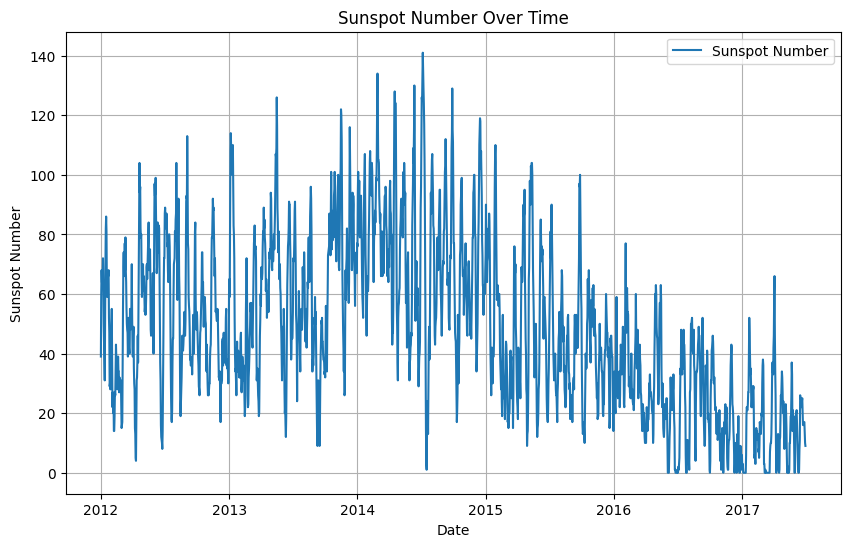

In [52]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
#T=df['Date'][1]-df['Date'][0]
T=1
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sunspot_Number'], label='Sunspot Number')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number Over Time')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22756\4141462292.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


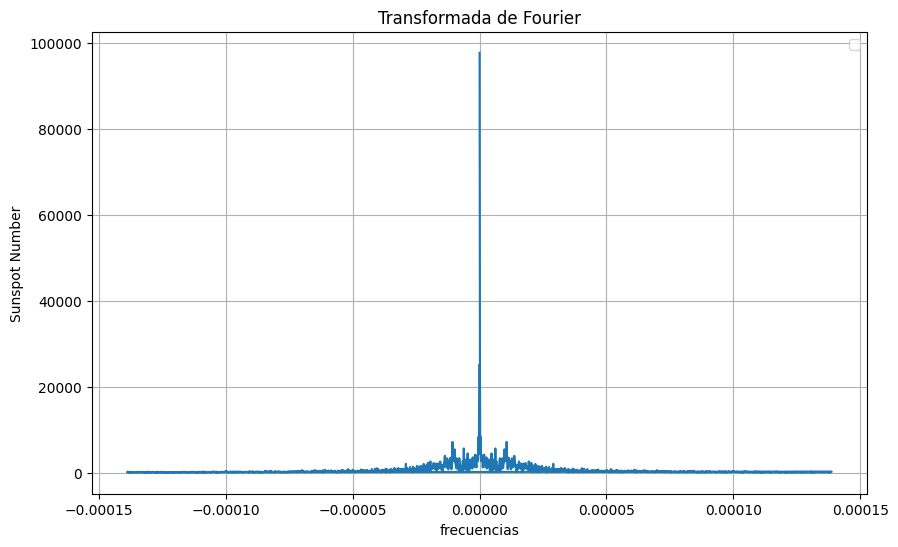

In [70]:


N = len(df['Sunspot_Number'])
yf=np.fft.fft(df['Sunspot_Number'])
xf=np.fft.fftfreq(N,d=3600)


plt.figure(figsize=(10, 6))
plt.plot(xf, abs(yf),)
plt.xlabel('frecuencias')
plt.ylabel('Sunspot Number')
plt.title('Transformada de Fourier')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
#2
